# Logistic regression
```



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

import matplotlib.pyplot as plt

from torch.utils.data import Dataset
from torch.utils.data import DataLoader


def readDataset(file_path, features_labels_to_drop):

  # reading the csvs
  dataset = pd.read_csv(file_path)

  features = dataset.drop(features_labels_to_drop, axis=1).to_numpy()
  features_torch = torch.from_numpy(features).to(torch.float32)

  labels = dataset["label"].to_numpy()
  labels_torch= torch.unsqueeze(torch.from_numpy(labels).to(torch.float32), 1)

  return features_torch, labels_torch



###########################
# Creating the dataloaders class
###########################

class newDataset(Dataset):
    def __init__(self, features, labels):
        self.data = features
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

###########################
# Creating a logistic regression model with Pytorch
###########################

class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        x = self.linear(x)
        x = torch.sigmoid(x)
        return x

###########################
# Define training procedure
###########################
def train(epoch, model):

    loss_per_epoch = 0
    correct_per_epoch = 0
    total_inputs_per_epoch = 0

    # set the model to training mode
    model.train()

    for batch_idx, (inputs, targets) in enumerate(training_dataLoader):
        # Clear gradient
        optimizer.zero_grad()

        # Forward pass batch through model
        outputs = model(inputs)

        # Calculate loss on batch (mean for this batch)
        loss = criterion(outputs, targets)
        # Calculate gradients for backward pass
        loss.backward()

        # Update model
        optimizer.step()

        loss_per_epoch += loss.item()
        total_inputs_per_epoch += targets.size(0)

        outputs_class = torch.zeros(targets.shape)
        outputs_class[outputs>=0.5] = 1
        correct_per_epoch += torch.sum(outputs_class==targets)


    epoch_loss = loss_per_epoch/len(training_dataLoader)
    accuracy_epoch = 100.*correct_per_epoch/total_inputs_per_epoch

    return epoch_loss, accuracy_epoch.item()


###########################
# Define testing procedure
###########################
def test(epoch, model):
    #print('Epoch: %d' % epoch)
    losses = [] # needed for visualize the traning loss
    model.eval()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(testing_dataLoader):
        # Forward pass batch through model
        outputs = model(inputs)

        # Calculate loss on batch
        loss = criterion(outputs, targets)
        train_loss += loss.item()

        total += targets.size(0)
        outputs_class = torch.zeros(targets.shape)
        outputs_class[outputs>=0.5] = 1
        correct += torch.sum(outputs_class==targets)

    #print(total)
    epoch_loss = train_loss/len(testing_dataLoader)
    accuracy_epoch = 100.*correct/total

    return epoch_loss, accuracy_epoch.item()


# Create the dataloaders

batch size defined here


In [2]:
filePath_training = "./datasets/training_dataset.csv"
filePath_testing = "./datasets/testing_dataset.csv"

drop_features_and_labels = ['dpkts', 'dbytes', 'sttl', 'dloss', 'dinpkt', 'sjit', 'djit', 'stcpb',
       'dtcpb', 'dwin', 'smean', 'trans_depth', 'response_body_len',
       'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm', 'attack_cat', "label"]

X_training, y_training = readDataset(filePath_training, drop_features_and_labels)
X_testing, y_testing = readDataset(filePath_testing, drop_features_and_labels)



# Defining batch size to create data loaders
batch_size = 16
training_dataset_object = newDataset(X_training, y_training)
training_dataLoader = DataLoader(training_dataset_object, batch_size=batch_size)

testing_dataset_object = newDataset(X_testing, y_testing)
testing_dataLoader = DataLoader(testing_dataset_object, batch_size=batch_size)

# Train first model

Parameters:


In [3]:
lr1 = 0.001
epochs = 20

model_lr1 = LogisticRegression(input_dim = X_training.shape[1])

criterion = nn.BCELoss()
optimizer = optim.Adam(model_lr1.parameters(), lr=lr1)


training_losses_lr1 = []
training_accs_lr1 = []
testing_losses_lr1 = []
testing_accs_lr1 = []

for epoch in range(epochs):

    loss_train, acc_train = train(epoch, model_lr1)
    training_losses_lr1.append(loss_train)
    training_accs_lr1.append(acc_train)

    loss_testing, acc_testing = test(epoch, model_lr1)
    testing_losses_lr1.append(loss_testing)
    testing_accs_lr1.append(acc_testing)

    print('Epoch: %d' % epoch + " Done   |   Training - loss: " + f"{loss_train:.3f}" +
          " acc: " + f"{acc_train:.3f}" + "   | Testing - loss: " + f"{loss_testing:.3f}" +
          " acc: " + f"{acc_testing:.3f}")


Epoch: 0 Done   |   Training - loss: 0.373 acc: 84.843   | Testing - loss: 0.286 acc: 88.510
Epoch: 1 Done   |   Training - loss: 0.262 acc: 89.029   | Testing - loss: 0.251 acc: 89.416
Epoch: 2 Done   |   Training - loss: 0.242 acc: 89.556   | Testing - loss: 0.240 acc: 89.790
Epoch: 3 Done   |   Training - loss: 0.234 acc: 89.860   | Testing - loss: 0.235 acc: 89.983
Epoch: 4 Done   |   Training - loss: 0.230 acc: 89.963   | Testing - loss: 0.231 acc: 90.033
Epoch: 5 Done   |   Training - loss: 0.227 acc: 90.025   | Testing - loss: 0.229 acc: 90.056
Epoch: 6 Done   |   Training - loss: 0.225 acc: 90.057   | Testing - loss: 0.227 acc: 90.080
Epoch: 7 Done   |   Training - loss: 0.224 acc: 90.076   | Testing - loss: 0.226 acc: 90.118
Epoch: 8 Done   |   Training - loss: 0.223 acc: 90.089   | Testing - loss: 0.225 acc: 90.113
Epoch: 9 Done   |   Training - loss: 0.222 acc: 90.100   | Testing - loss: 0.224 acc: 90.114
Epoch: 10 Done   |   Training - loss: 0.221 acc: 90.101   | Testing - 

# Train second model

Parameters:


In [5]:
lr2 = 0.01
epochs = 20

model_lr2 = LogisticRegression(input_dim = X_training.shape[1])

criterion = nn.BCELoss()
optimizer = optim.Adam(model_lr2.parameters(), lr=lr2)



training_losses_lr2 = []
training_accs_lr2 = []
testing_losses_lr2 = []
testing_accs_lr2 = []

for epoch in range(epochs):

    loss_train, acc_train = train(epoch, model_lr2)
    training_losses_lr2.append(loss_train)
    training_accs_lr2.append(acc_train)

    loss_testing, acc_testing = test(epoch, model_lr2)
    testing_losses_lr2.append(loss_testing)
    testing_accs_lr2.append(acc_testing)

    print('Epoch: %d' % epoch + " Done   |   Training - loss: " + f"{loss_train:.3f}" +
          " acc: " + f"{acc_train:.3f}" + "   | Testing - loss: " + f"{loss_testing:.3f}" +
          " acc: " + f"{acc_testing:.3f}")

Epoch: 0 Done   |   Training - loss: 0.251 acc: 89.484   | Testing - loss: 0.226 acc: 90.541
Epoch: 1 Done   |   Training - loss: 0.220 acc: 90.129   | Testing - loss: 0.221 acc: 90.472
Epoch: 2 Done   |   Training - loss: 0.218 acc: 90.151   | Testing - loss: 0.220 acc: 90.456
Epoch: 3 Done   |   Training - loss: 0.217 acc: 90.166   | Testing - loss: 0.219 acc: 90.419
Epoch: 4 Done   |   Training - loss: 0.217 acc: 90.178   | Testing - loss: 0.219 acc: 90.409
Epoch: 5 Done   |   Training - loss: 0.217 acc: 90.198   | Testing - loss: 0.219 acc: 90.406
Epoch: 6 Done   |   Training - loss: 0.216 acc: 90.210   | Testing - loss: 0.218 acc: 90.398
Epoch: 7 Done   |   Training - loss: 0.216 acc: 90.227   | Testing - loss: 0.218 acc: 90.402
Epoch: 8 Done   |   Training - loss: 0.216 acc: 90.238   | Testing - loss: 0.218 acc: 90.409
Epoch: 9 Done   |   Training - loss: 0.216 acc: 90.251   | Testing - loss: 0.218 acc: 90.415
Epoch: 10 Done   |   Training - loss: 0.216 acc: 90.271   | Testing - 

# Train third model

Parameters:


In [6]:
lr3 = 0.1
epochs = 20

model_lr3 = LogisticRegression(input_dim = X_training.shape[1])

criterion = nn.BCELoss()
optimizer = optim.Adam(model_lr3.parameters(), lr=lr3)



training_losses_lr3 = []
training_accs_lr3 = []
testing_losses_lr3 = []
testing_accs_lr3 = []

for epoch in range(epochs):

    # training
    loss_train, acc_train = train(epoch, model_lr3)
    training_losses_lr3.append(loss_train)
    training_accs_lr3.append(acc_train)

    loss_testing, acc_testing = test(epoch, model_lr3)
    testing_losses_lr3.append(loss_testing)
    testing_accs_lr3.append(acc_testing)

    print('Epoch: %d' % epoch + " Done   |   Training - loss: " + f"{loss_train:.3f}" +
          " acc: " + f"{acc_train:.3f}" + "   | Testing - loss: " + f"{loss_testing:.3f}" +
          " acc: " + f"{acc_testing:.3f}")

Epoch: 0 Done   |   Training - loss: 0.238 acc: 89.825   | Testing - loss: 0.253 acc: 90.184
Epoch: 1 Done   |   Training - loss: 0.263 acc: 90.013   | Testing - loss: 0.252 acc: 90.210
Epoch: 2 Done   |   Training - loss: 0.263 acc: 90.029   | Testing - loss: 0.252 acc: 90.250
Epoch: 3 Done   |   Training - loss: 0.262 acc: 90.063   | Testing - loss: 0.251 acc: 90.262
Epoch: 4 Done   |   Training - loss: 0.262 acc: 90.075   | Testing - loss: 0.251 acc: 90.278
Epoch: 5 Done   |   Training - loss: 0.262 acc: 90.089   | Testing - loss: 0.251 acc: 90.281
Epoch: 6 Done   |   Training - loss: 0.262 acc: 90.110   | Testing - loss: 0.251 acc: 90.301
Epoch: 7 Done   |   Training - loss: 0.262 acc: 90.116   | Testing - loss: 0.250 acc: 90.312
Epoch: 8 Done   |   Training - loss: 0.261 acc: 90.124   | Testing - loss: 0.250 acc: 90.316
Epoch: 9 Done   |   Training - loss: 0.261 acc: 90.151   | Testing - loss: 0.250 acc: 90.326
Epoch: 10 Done   |   Training - loss: 0.261 acc: 90.164   | Testing - 

# Plot results

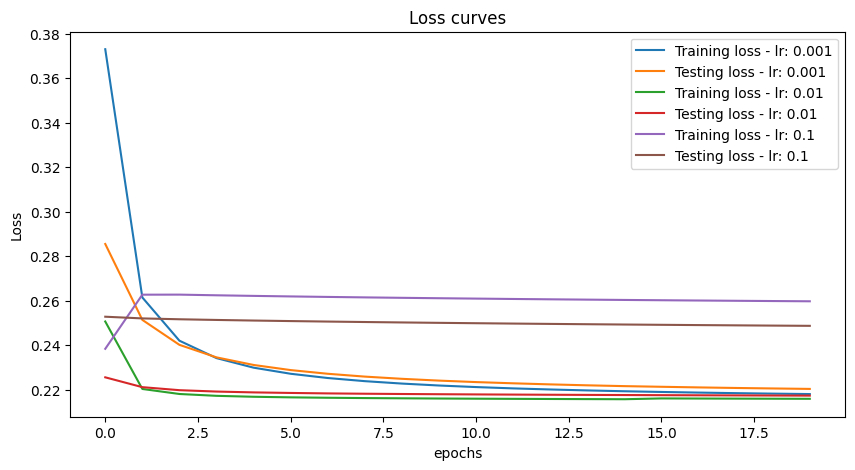

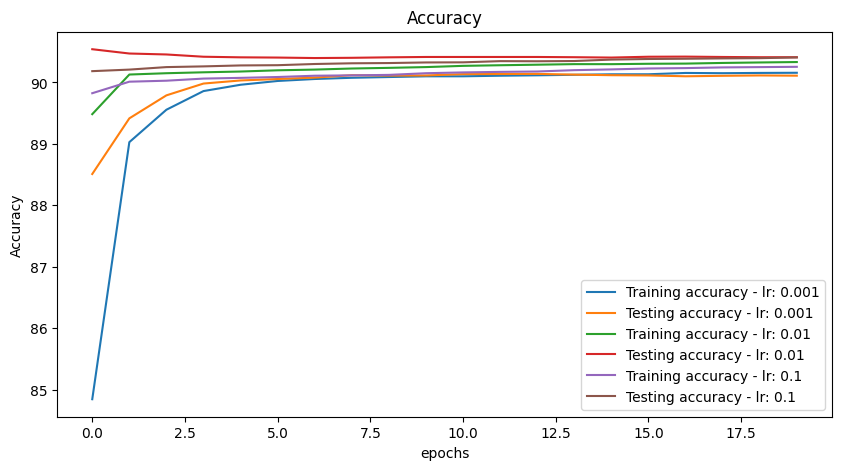

In [7]:

plt.figure(figsize=(10,5))
ax = plt.gca()
plt.plot(training_losses_lr1, label="Training loss - lr: "+str(lr1))
plt.plot(testing_losses_lr1, label="Testing loss - lr: "+str(lr1))
plt.plot(training_losses_lr2, label="Training loss - lr: "+str(lr2))
plt.plot(testing_losses_lr2, label="Testing loss - lr: "+str(lr2))
plt.plot(training_losses_lr3, label="Training loss - lr: "+str(lr3))
plt.plot(testing_losses_lr3, label="Testing loss - lr: "+str(lr3))
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Loss curves")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
ax = plt.gca()
plt.plot(training_accs_lr1, label="Training accuracy - lr: "+str(lr1))
plt.plot(testing_accs_lr1, label="Testing accuracy - lr: "+str(lr1))
plt.plot(training_accs_lr2, label="Training accuracy - lr: "+str(lr2))
plt.plot(testing_accs_lr2, label="Testing accuracy - lr: "+str(lr2))
plt.plot(training_accs_lr3, label="Training accuracy - lr: "+str(lr3))
plt.plot(testing_accs_lr3, label="Testing accuracy - lr: "+str(lr3))
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()